In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 5

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
29/30 [============================>.] - ETA: 0s - loss: 1.6907 - accuracy: 0.2131
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 3s 45ms/step - loss: 1.6884 - accuracy: 0.2160 - val_loss: 1.5807 - val_accuracy: 0.2604
Epoch 2/1000
25/30 [========================>.....] - ETA: 0s - loss: 1.5814 - accuracy: 0.2791
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 1.5757 - accuracy: 0.2837 - val_loss: 1.4936 - val_accuracy: 0.3926
Epoch 3/1000
26/30 [=========================>....] - ETA: 0s - loss: 1.4890 - accuracy: 0.3609
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 1.4823 - accuracy: 0.3659 - val_loss: 1.3793 - val_accuracy: 0.4359
Epoch 4/1000
29/30 [============================>.] - ETA: 0s - loss: 1.3938 - accuracy: 0.4108


24/30 [=======================>......] - ETA: 0s - loss: 0.8008 - accuracy: 0.6969
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 0.8134 - accuracy: 0.6895 - val_loss: 0.5079 - val_accuracy: 0.8836
Epoch 29/1000
25/30 [========================>.....] - ETA: 0s - loss: 0.8082 - accuracy: 0.6800
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 7ms/step - loss: 0.8049 - accuracy: 0.6832 - val_loss: 0.5091 - val_accuracy: 0.8796
Epoch 30/1000
27/30 [==========================>...] - ETA: 0s - loss: 0.8066 - accuracy: 0.6846
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 0.8027 - accuracy: 0.6885 - val_loss: 0.4953 - val_accuracy: 0.8820
Epoch 31/1000
16/30 [===============>..............] - ETA: 0s - loss: 0.8111 - accuracy: 0.6855
Epoch 31

26/30 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.7395
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.7399 - val_loss: 0.3378 - val_accuracy: 0.9182
Epoch 56/1000
30/30 [==============================] - ETA: 0s - loss: 0.6711 - accuracy: 0.7451
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 0.6711 - accuracy: 0.7451 - val_loss: 0.3405 - val_accuracy: 0.9166
Epoch 57/1000
26/30 [=========================>....] - ETA: 0s - loss: 0.6869 - accuracy: 0.7422
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 0.6842 - accuracy: 0.7428 - val_loss: 0.3354 - val_accuracy: 0.9197
Epoch 58/1000
25/30 [========================>.....] - ETA: 0s - loss: 0.6719 - accuracy: 0.7466
Epoch 58

16/30 [===============>..............] - ETA: 0s - loss: 0.6150 - accuracy: 0.7715
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 0.6154 - accuracy: 0.7745 - val_loss: 0.2791 - val_accuracy: 0.9386
Epoch 83/1000
30/30 [==============================] - ETA: 0s - loss: 0.6356 - accuracy: 0.7672
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 0.6356 - accuracy: 0.7672 - val_loss: 0.2729 - val_accuracy: 0.9465
Epoch 84/1000
29/30 [============================>.] - ETA: 0s - loss: 0.6181 - accuracy: 0.7702
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 0.6195 - accuracy: 0.7698 - val_loss: 0.2750 - val_accuracy: 0.9441
Epoch 85/1000
29/30 [============================>.] - ETA: 0s - loss: 0.6226 - accuracy: 0.7732
Epoch 85

25/30 [========================>.....] - ETA: 0s - loss: 0.5840 - accuracy: 0.7844
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 7ms/step - loss: 0.5891 - accuracy: 0.7822 - val_loss: 0.2402 - val_accuracy: 0.9528
Epoch 110/1000
27/30 [==========================>...] - ETA: 0s - loss: 0.5714 - accuracy: 0.7847
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 7ms/step - loss: 0.5699 - accuracy: 0.7822 - val_loss: 0.2388 - val_accuracy: 0.9552
Epoch 111/1000
27/30 [==========================>...] - ETA: 0s - loss: 0.5925 - accuracy: 0.7830
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 7ms/step - loss: 0.5850 - accuracy: 0.7856 - val_loss: 0.2450 - val_accuracy: 0.9544
Epoch 112/1000
25/30 [========================>.....] - ETA: 0s - loss: 0.6072 - accuracy: 0.7694
Ep

Epoch 136/1000
28/30 [===========================>..] - ETA: 0s - loss: 0.5504 - accuracy: 0.8058
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 0.5489 - accuracy: 0.8055 - val_loss: 0.2396 - val_accuracy: 0.9520
Epoch 137/1000
24/30 [=======================>......] - ETA: 0s - loss: 0.5752 - accuracy: 0.7868
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 0.5728 - accuracy: 0.7869 - val_loss: 0.2421 - val_accuracy: 0.9520
Epoch 138/1000
29/30 [============================>.] - ETA: 0s - loss: 0.5535 - accuracy: 0.7982
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 0.5552 - accuracy: 0.7966 - val_loss: 0.2423 - val_accuracy: 0.9552
Epoch 139/1000
28/30 [===========================>..] - ETA: 0s - loss: 0.5652 - accu

Epoch 163/1000
25/30 [========================>.....] - ETA: 0s - loss: 0.5603 - accuracy: 0.7994
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 7ms/step - loss: 0.5645 - accuracy: 0.7987 - val_loss: 0.2385 - val_accuracy: 0.9630
Epoch 164/1000
29/30 [============================>.] - ETA: 0s - loss: 0.5451 - accuracy: 0.8033
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 0.5449 - accuracy: 0.8031 - val_loss: 0.2358 - val_accuracy: 0.9607
Epoch 165/1000
28/30 [===========================>..] - ETA: 0s - loss: 0.5199 - accuracy: 0.8131
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 0.5171 - accuracy: 0.8131 - val_loss: 0.2305 - val_accuracy: 0.9599
Epoch 166/1000
27/30 [==========================>...] - ETA: 0s - loss: 0.5226 - accu

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 4ms/step - loss: 0.2383 - accuracy: 0.9591


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.10464893 0.01310493 0.00150803 0.00716706 0.8735711 ]
4


# Confusion matrix

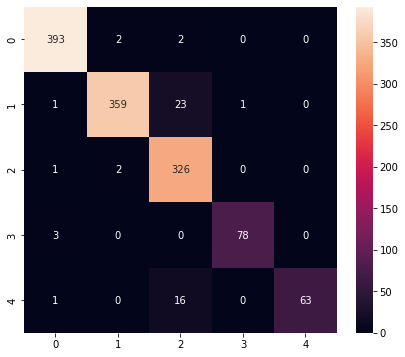

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       397
           1       0.99      0.93      0.96       384
           2       0.89      0.99      0.94       329
           3       0.99      0.96      0.97        81
           4       1.00      0.79      0.88        80

    accuracy                           0.96      1271
   macro avg       0.97      0.93      0.95      1271
weighted avg       0.96      0.96      0.96      1271



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ryan6\AppData\Local\Temp\tmpeovi15o_\assets


6464

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.1046489  0.01310493 0.00150803 0.00716706 0.8735711 ]
4
